### 1. Benchmark Dataset:
타이타닉 호에서 탑승했던 사람들의 정보를 바탕으로 생존 여부를 예측하는 문제입니다. 과제에서 제시한 머신러닝 모델들을 이용하여 각 모델의 성능을 평가해야 합니다. 데이터는 다음 주소에서 얻을 수 있습니다: https://www.kaggle.com/c/titanic 이번 과제에서는 모델 학습 및 테스트 모두 train.csv파일을 이용합니다. 과제를 수행하실 때 다음의 feature들은 모델 학습에 이용하지 않도록 주의해주세요.

* 제외할 feature: PassengerId, Name, Ticket, Cabin

In [1]:
#### 데이터 로드 ####
import pandas as pd
df = pd.read_csv("train.csv")

#### Sex(female,male) -> male(0,1) 로 변경 ####

male = []
for line in df['Sex']:
    if line == 'male':
        male.append(1)
    elif line == 'female':
        male.append(0)
    else:
        male.append(None)
        
df['Male'] = male       

#### Embarked -> S, C, Q 로 나누기 ####
S = []
C = []
Q = []
for line in df['Embarked']:
    if line == 'S':
        S.append(1)
        C.append(0)
        Q.append(0)
    elif line == 'C':
        S.append(0)
        C.append(1)
        Q.append(0)
    elif line == 'Q':
        S.append(0)
        C.append(0)
        Q.append(1)
    else:
        S.append(None)
        C.append(None)
        Q.append(None)
df['S'] = S
df['C'] = C
df['Q'] = Q

#### 'PassengerId','Name','Ticket','Cabin' + 'Sex','Embarked' 제거 ####
df = df.drop(['PassengerId','Name','Ticket','Cabin','Sex','Embarked'], axis = 1)

### 2. Preprocessing

In [2]:
#### NULL 제거 ####
x = len(df)
df = df.dropna(axis = 0)
y =  len(df)
print(f'{x-y}개 행 삭제')
df

179개 행 삭제


,Survived,Pclass,Age,SibSp,Parch,Fare,Male,S,C,Q
0,0,3,22.0,1,0,7.2500,1,1.0,0.0,0.0
1,1,1,38.0,1,0,71.2833,0,0.0,1.0,0.0
2,1,3,26.0,0,0,7.9250,0,1.0,0.0,0.0
3,1,1,35.0,1,0,53.1000,0,1.0,0.0,0.0
4,0,3,35.0,0,0,8.0500,1,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,0,0.0,0.0,1.0
886,0,2,27.0,0,0,13.0000,1,1.0,0.0,0.0
887,1,1,19.0,0,0,30.0000,0,1.0,0.0,0.0
889,1,1,26.0,0,0,30.0000,1,0.0,1.0,0.0


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
#### split train & test ####

X = df.drop("Survived", axis=1)
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 3. Machine Learning Models:
scikit-learn을 이용해 후술할 세 가지 machine learning model를 구현하고 성능을 평가하세요.

### 3-1. K-Nearest Neighbors(KNN) (sklearn.neighbors.KNeighborsClassifier):

K의 개수를 [3~5]로
변화시키면서 test data에서 결과가 어떻게 변하는지 분석하세요.

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [6]:
dicKNN = {}

for i in range(3,6):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train,y_train)
    y_pred = neigh.predict(X_test)
    
    tn, fp, fn, tp= confusion_matrix(y_test, y_pred).ravel()
    
    print('==============================================================================\n')
    print(f'K = {i}\n')
    print(f'TN = {tn} FP = {fp}')
    print(f'FN = {fn} TP = {tp}\n')
    
    print(f'정확도 = {(tp+tn)/(tp+fp+tn+fn)} // 수식')
    print(f'정확도 = {neigh.score(X_test, y_test, sample_weight=None)} // .score()\n')
    
    Precision = tp/(tp+fp)
    Recall = tp/(tp+fn)
    
    print(f'F1 Score = {(2*Precision*Recall)/(Precision+Recall)} // 수식')
    print(f'F1 Score = {f1_score(y_test, y_pred)} // .f1_score()\n')
    
    dicKNN[f'K = {i}'] = (neigh.score(X_test, y_test, sample_weight=None),f1_score(y_test, y_pred))
print('==============================================================================')


K = 3

TN = 94 FP = 31
FN = 42 TP = 47

정확도 = 0.6588785046728972 // 수식
정확도 = 0.6588785046728972 // .score()

F1 Score = 0.562874251497006 // 수식
F1 Score = 0.562874251497006 // .f1_score()


K = 4

TN = 101 FP = 24
FN = 51 TP = 38

정확도 = 0.6495327102803738 // 수식
정확도 = 0.6495327102803738 // .score()

F1 Score = 0.5033112582781456 // 수식
F1 Score = 0.5033112582781456 // .f1_score()


K = 5

TN = 91 FP = 34
FN = 43 TP = 46

정확도 = 0.6401869158878505 // 수식
정확도 = 0.6401869158878505 // .score()

F1 Score = 0.544378698224852 // 수식
F1 Score = 0.544378698224852 // .f1_score()



### 3-2 Logistic Regression (sklearn.linear_model.LogisticRegression):

Iteration 횟수(max_iter)를 [0-100] 범위에서 20씩 변화시키면서 test data에서 결과가 어떻게 변하는지 분석하세요.Iteration 횟수를 100으로 고정한 후 regularization term(scikit-learn에서는 C)를 [1-5]의 범위에서 1씩 변화시키면서 test data에서 결과가 어떻게 변하는지 분석하세요.


In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
dicLR_max_iter = {}

for i in range(0,101,20):
    model = LogisticRegression(random_state=2021711695 , max_iter=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    tn, fp, fn, tp= confusion_matrix(y_test, y_pred).ravel()

    print('==============================================================================\n')
    print(f'max_iter = {i}\n')
    print(f'TN = {tn} FP = {fp}')
    print(f'FN = {fn} TP = {tp}\n')

    print(f'정확도 = {(tp+tn)/(tp+fp+tn+fn)} // 수식')
    print(f'정확도 = {model.score(X_test, y_test, sample_weight=None)} // .score()\n')

    Precision = tp/(tp+fp)
    Recall = tp/(tp+fn)

    print(f'F1 Score = {(2*Precision*Recall)/(Precision+Recall)} // 수식')
    print(f'F1 Score = {f1_score(y_test, y_pred)} // .f1_score()\n')
    
    dicLR_max_iter[f'max_iter = {i}'] = (model.score(X_test, y_test, sample_weight=None),f1_score(y_test, y_pred))
print('==============================================================================')


max_iter = 0

TN = 94 FP = 31
FN = 46 TP = 43

정확도 = 0.6401869158878505 // 수식
정확도 = 0.6401869158878505 // .score()

F1 Score = 0.5276073619631902 // 수식
F1 Score = 0.5276073619631902 // .f1_score()


max_iter = 20

TN = 107 FP = 18
FN = 39 TP = 50

정확도 = 0.7336448598130841 // 수식
정확도 = 0.7336448598130841 // .score()

F1 Score = 0.6369426751592357 // 수식
F1 Score = 0.6369426751592357 // .f1_score()


max_iter = 40

TN = 103 FP = 22
FN = 29 TP = 60

정확도 = 0.7616822429906542 // 수식
정확도 = 0.7616822429906542 // .score()

F1 Score = 0.7017543859649121 // 수식
F1 Score = 0.7017543859649121 // .f1_score()


max_iter = 60

TN = 105 FP = 20
FN = 32 TP = 57

정확도 = 0.7570093457943925 // 수식
정확도 = 0.7570093457943925 // .score()

F1 Score = 0.6867469879518073 // 수식
F1 Score = 0.6867469879518073 // .f1_score()


max_iter = 80

TN = 104 FP = 21
FN = 31 TP = 58

정확도 = 0.7570093457943925 // 수식
정확도 = 0.7570093457943925 // .score()

F1 Score = 0.6904761904761905 // 수식
F1 Score = 0.6904761904761905 // .f1_score(

C:\Users\LEE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LEE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

In [9]:
dicLR_C = {}
for i in range(1,6):
    model = LogisticRegression(C=i, random_state=2021711695 , max_iter=100)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    tn, fp, fn, tp= confusion_matrix(y_test, y_pred).ravel()

    print('==============================================================================\n')
    print(f'C(regularization term) = {i}\n')
    print(f'TN = {tn} FP = {fp}')
    print(f'FN = {fn} TP = {tp}\n')

    print(f'정확도 = {(tp+tn)/(tp+fp+tn+fn)} // 수식')
    print(f'정확도 = {model.score(X_test, y_test, sample_weight=None)} // .score()\n')

    Precision = tp/(tp+fp)
    Recall = tp/(tp+fn)

    print(f'F1 Score = {(2*Precision*Recall)/(Precision+Recall)} // 수식')
    print(f'F1 Score = {f1_score(y_test, y_pred)} // .f1_score()\n')
    
    dicLR_C[f'C = {i}'] = (model.score(X_test, y_test, sample_weight=None),f1_score(y_test, y_pred))
print('==============================================================================')

C:\Users\LEE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LEE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 


C(regularization term) = 1

TN = 103 FP = 22
FN = 29 TP = 60

정확도 = 0.7616822429906542 // 수식
정확도 = 0.7616822429906542 // .score()

F1 Score = 0.7017543859649121 // 수식
F1 Score = 0.7017543859649121 // .f1_score()


C(regularization term) = 2

TN = 105 FP = 20
FN = 29 TP = 60

정확도 = 0.7710280373831776 // 수식
정확도 = 0.7710280373831776 // .score()

F1 Score = 0.7100591715976332 // 수식
F1 Score = 0.7100591715976332 // .f1_score()


C(regularization term) = 3

TN = 105 FP = 20
FN = 29 TP = 60

정확도 = 0.7710280373831776 // 수식
정확도 = 0.7710280373831776 // .score()

F1 Score = 0.7100591715976332 // 수식
F1 Score = 0.7100591715976332 // .f1_score()


C(regularization term) = 4

TN = 104 FP = 21
FN = 29 TP = 60

정확도 = 0.7663551401869159 // 수식
정확도 = 0.7663551401869159 // .score()

F1 Score = 0.7058823529411764 // 수식
F1 Score = 0.7058823529411764 // .f1_score()


C(regularization term) = 5

TN = 103 FP = 22
FN = 31 TP = 58

정확도 = 0.7523364485981309 // 수식
정확도 = 0.7523364485981309 // .score()

F1 Score = 0

C:\Users\LEE\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 3-3 Decision Tree (sklearn.tree.DecisionTreeClassifier):
Information gain을 통해 decision tree에서 첫번째, 두번째 depth의 분리기준을 분석하세요. 또한, max_depth=None 일 때, 적절한 tool을 이용하여 각 depth에서의 조건과 gain값을 알 수 있도록 tree를 시각화하세요. max_depth를 [1~3, None]로 변화할 때, test data에서 결과가 어떻게 변하는지 분석하세요.

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn import tree

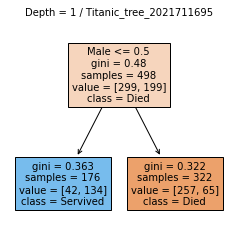

In [11]:
clf = DecisionTreeClassifier(random_state=2021711695, max_depth = 1)
clf.fit(X_train, y_train)

fig = plt.figure(figsize=(4,4))
_ = tree.plot_tree(clf, 
                   feature_names=list(X_test.columns),  
                   class_names=['Died','Servived'],
                   fontsize = 10,
                   filled=True)
plt.title('Depth = 1 / Titanic_tree_2021711695', fontsize = 10)
plt.show()
fig.savefig('Depth=1_plot_tree.png')

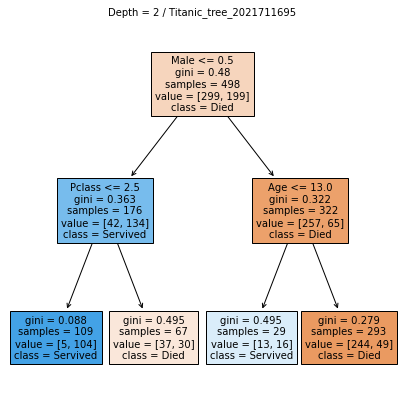

In [12]:
clf = DecisionTreeClassifier(random_state=2021711695, max_depth = 2)
clf.fit(X_train, y_train)

fig = plt.figure(figsize=(7,7))
_ = tree.plot_tree(clf, 
                   feature_names=list(X_test.columns),  
                   class_names=['Died','Servived'],
                   fontsize = 10,
                   filled=True)
plt.title('Depth = 2 / Titanic_tree_2021711695', fontsize = 10)
plt.show()
fig.savefig('Depth=2_plot_tree.png')

In [13]:
### max_depth 1~3, None ###

dicTree = {}
for i in [1,2,3, None]:
    clf = DecisionTreeClassifier(random_state=2021711695, max_depth = i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test, check_input=True)

    tn, fp, fn, tp= confusion_matrix(y_test, y_pred).ravel()

    print('==============================================================================\n')
    print(f'max_depth = {i}\n')
    print(f'TN = {tn} FP = {fp}')
    print(f'FN = {fn} TP = {tp}\n')

    print(f'정확도 = {(tp+tn)/(tp+fp+tn+fn)} // 수식')
    print(f'정확도 = {clf.score(X_test, y_test, sample_weight=None)} // .score()\n')

    Precision = tp/(tp+fp)
    Recall = tp/(tp+fn)

    print(f'F1 Score = {(2*Precision*Recall)/(Precision+Recall)} // 수식')
    print(f'F1 Score = {f1_score(y_test, y_pred)} // .f1_score()\n')
    
    dicTree[f'Max_depth = {i}'] = (clf.score(X_test, y_test, sample_weight=None),f1_score(y_test, y_pred))
print('==============================================================================')


max_depth = 1

TN = 103 FP = 22
FN = 28 TP = 61

정확도 = 0.7663551401869159 // 수식
정확도 = 0.7663551401869159 // .score()

F1 Score = 0.7093023255813955 // 수식
F1 Score = 0.7093023255813955 // .f1_score()


max_depth = 2

TN = 118 FP = 7
FN = 40 TP = 49

정확도 = 0.780373831775701 // 수식
정확도 = 0.780373831775701 // .score()

F1 Score = 0.6758620689655173 // 수식
F1 Score = 0.6758620689655173 // .f1_score()


max_depth = 3

TN = 105 FP = 20
FN = 24 TP = 65

정확도 = 0.794392523364486 // 수식
정확도 = 0.794392523364486 // .score()

F1 Score = 0.7471264367816092 // 수식
F1 Score = 0.7471264367816092 // .f1_score()


max_depth = None

TN = 94 FP = 31
FN = 20 TP = 69

정확도 = 0.7616822429906542 // 수식
정확도 = 0.7616822429906542 // .score()

F1 Score = 0.7301587301587302 // 수식
F1 Score = 0.7301587301587302 // .f1_score()



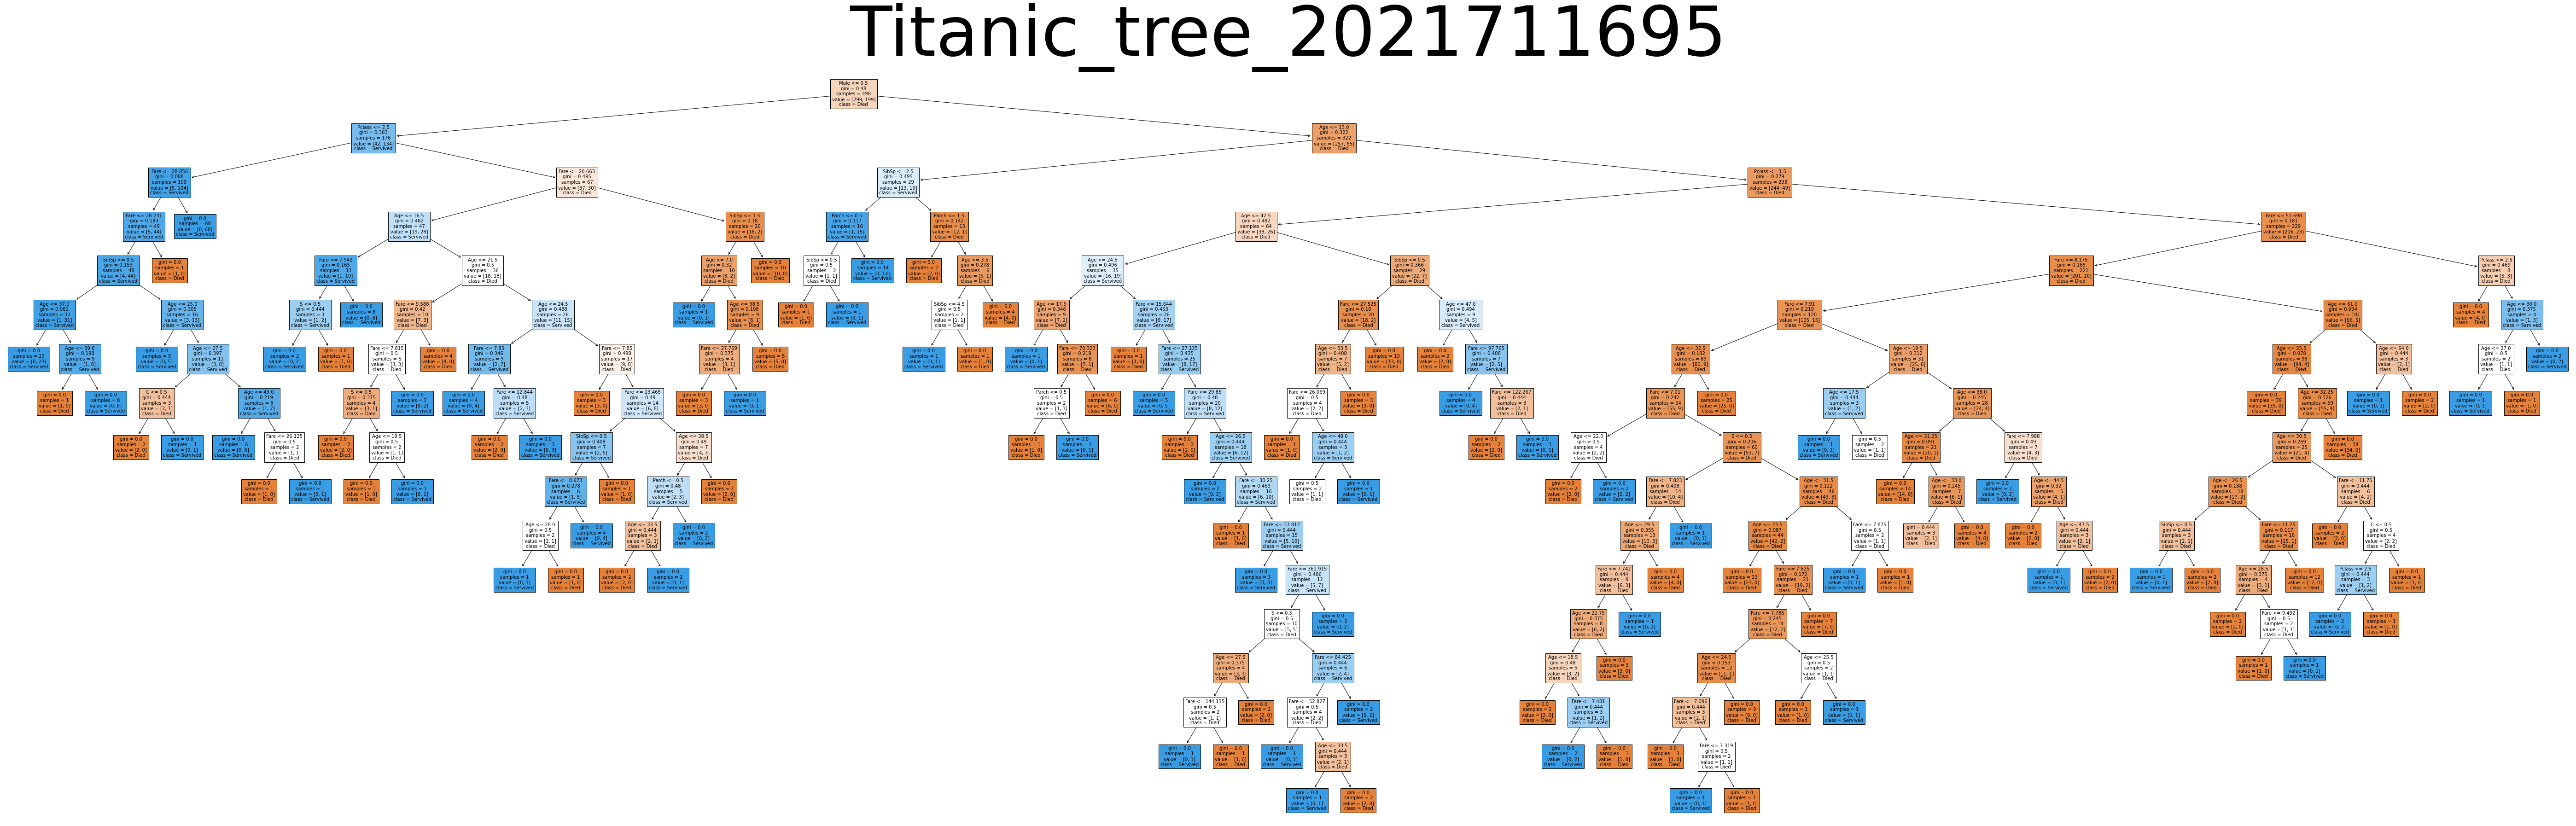

In [14]:
clf = DecisionTreeClassifier(random_state=2021711695)
clf.fit(X_train, y_train)

fig = plt.figure(figsize=(100,30))
_ = tree.plot_tree(clf, 
                   feature_names=list(X_test.columns),  
                   class_names=['Died','Servived'],
                   fontsize = 10,
                   filled=True)
plt.title('Titanic_tree_2021711695', fontsize = 150)
plt.show()
fig.savefig('Depth=None_plot_tree.png')

### 4. Evaluation Methods: 

각각 모델에 따른 성능을 Accuracy, F1-Score을 통해 나타내세요.

In [15]:
KNN = pd.DataFrame(dicKNN, index = ['Accuracy', 'F1 Score']).transpose().sort_values(by='Accuracy',ascending = False)

LR_max_iter = pd.DataFrame(dicLR_max_iter, index = ['Accuracy', 'F1 Score']).transpose().sort_values(by='Accuracy',ascending = False)

LR_C = pd.DataFrame(dicLR_C, index = ['Accuracy', 'F1 Score']).transpose().sort_values(by='Accuracy',ascending = False)

Tree = pd.DataFrame(dicTree, index = ['Accuracy', 'F1 Score']).transpose().sort_values(by='Accuracy',ascending = False)

In [16]:
KNN.to_csv('KNN.csv', index = True)
KNN

,Accuracy,F1 Score
K = 3,0.658879,0.562874
K = 4,0.649533,0.503311
K = 5,0.640187,0.544379


In [17]:
LR_max_iter.to_csv('LR_max_iter.csv', index = True)
LR_max_iter

,Accuracy,F1 Score
max_iter = 40,0.761682,0.701754
max_iter = 100,0.761682,0.701754
max_iter = 60,0.757009,0.686747
max_iter = 80,0.757009,0.690476
max_iter = 20,0.733645,0.636943
max_iter = 0,0.640187,0.527607


In [18]:
LR_C.to_csv('LR_C.csv', index = True)
LR_C

,Accuracy,F1 Score
C = 2,0.771028,0.710059
C = 3,0.771028,0.710059
C = 4,0.766355,0.705882
C = 1,0.761682,0.701754
C = 5,0.752336,0.686391


In [19]:
Tree.to_csv('Tree.csv', index = True)
Tree

,Accuracy,F1 Score
Max_depth = 3,0.794393,0.747126
Max_depth = 2,0.780374,0.675862
Max_depth = 1,0.766355,0.709302
Max_depth = None,0.761682,0.730159


In [20]:
KNN.sort_values(by='F1 Score',ascending = False)

,Accuracy,F1 Score
K = 3,0.658879,0.562874
K = 5,0.640187,0.544379
K = 4,0.649533,0.503311


In [21]:
LR_max_iter.sort_values(by='F1 Score',ascending = False)

,Accuracy,F1 Score
max_iter = 40,0.761682,0.701754
max_iter = 100,0.761682,0.701754
max_iter = 80,0.757009,0.690476
max_iter = 60,0.757009,0.686747
max_iter = 20,0.733645,0.636943
max_iter = 0,0.640187,0.527607


In [22]:
LR_C.sort_values(by='F1 Score',ascending = False)

,Accuracy,F1 Score
C = 2,0.771028,0.710059
C = 3,0.771028,0.710059
C = 4,0.766355,0.705882
C = 1,0.761682,0.701754
C = 5,0.752336,0.686391


In [23]:
Tree.sort_values(by='F1 Score',ascending = False)

,Accuracy,F1 Score
Max_depth = 3,0.794393,0.747126
Max_depth = None,0.761682,0.730159
Max_depth = 1,0.766355,0.709302
Max_depth = 2,0.780374,0.675862
